In [1]:
import pandas as pd

In [4]:
df = pd.read_csv("D:\Retail Data Analytics\Features data set.csv")

<>:1: SyntaxWarning: invalid escape sequence '\R'
<>:1: SyntaxWarning: invalid escape sequence '\R'
C:\Users\mkl98\AppData\Local\Temp\ipykernel_19716\178200328.py:1: SyntaxWarning: invalid escape sequence '\R'
  df = pd.read_csv("D:\Retail Data Analytics\Features data set.csv")


In [5]:
df

,date,forecast
0,1970-02-28,8190.0
1,1970-03-31,8190.0
2,1970-04-30,8190.0
3,1970-05-31,8190.0
4,1970-06-30,8190.0
5,1970-07-31,8190.0


In [6]:
df = df.sort_values('date').reset_index(drop=True)


In [8]:
df.head(),df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      6 non-null      object 
 1   forecast  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 228.0+ bytes


(         date  forecast
 0  1970-02-28    8190.0
 1  1970-03-31    8190.0
 2  1970-04-30    8190.0
 3  1970-05-31    8190.0
 4  1970-06-30    8190.0,
 None)

In [10]:
print(df.columns)


Index(['date', 'forecast'], dtype='object')


In [14]:
df_daily = df.groupby('date').agg({'forecast': 'sum'}).asfreq('D').fillna(0)



In [15]:
df_daily

,forecast
date,
1970-02-28,0.0
1970-03-01,0.0
1970-03-02,0.0
1970-03-03,0.0
1970-03-04,0.0
...,...
1970-07-27,0.0
1970-07-28,0.0
1970-07-29,0.0


In [17]:
# Aggregate to daily totals if your raw is transactional
df_daily = df.groupby('date').agg({'forecast':'sum'}).asfreq('D').fillna(0)  # choose fillna strategy

# Optionally smooth tiny negative values or clip:
df_daily['forecast'] = df_daily['forecast'].clip(lower=0)


In [19]:
!pip install statsmodels


   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.6 MB 11.4 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.6 MB 11.6 MB/s eta 0:00:01
   ------------------------------ --------- 7.3/9.6 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------  9.4/9.6 MB 11.6 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 9.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -- ------------------------------------- 2.4/38.5 MB 11.8 MB/s eta 0:00:04
   ---- ----------------------------------- 4.7/38.5 MB 11.7 MB/s eta 0:00:03
   ------- -------------------------------- 7.3/38.5 MB 11.7 MB/s eta 0:00:03
   ---------- ----------------------------- 9.7/38.5 MB 11.7 MB/s eta 0:00:03
   ------------ --------------------------- 12.3/38.5 MB 11.7 MB/s eta 0:00:03
   --------------- ------------------------ 14.9/38.5 MB 11.7 MB/s eta 0:00:03
   ----


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


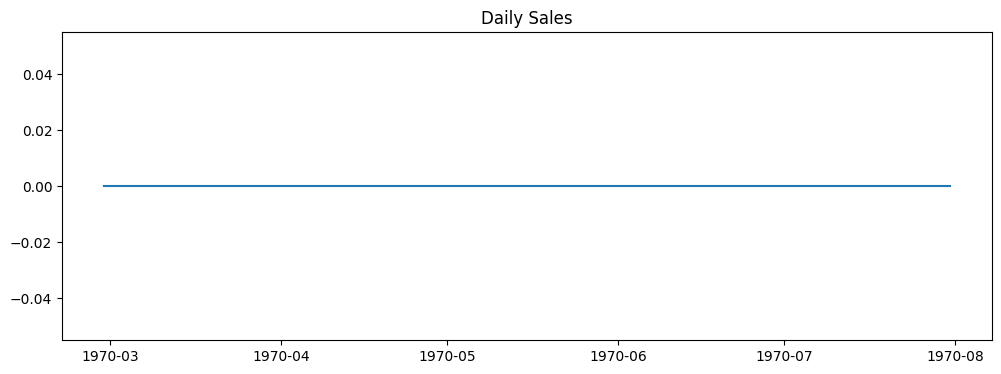

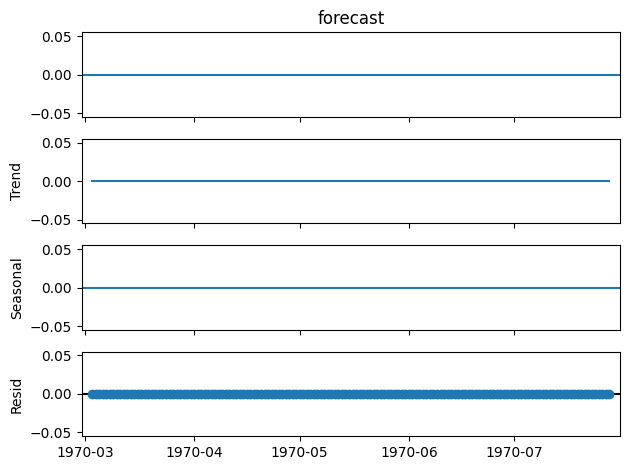

c:\Users\mkl98\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\stattools.py:702: RuntimeWarning: invalid value encountered in divide
  acf = avf[: nlags + 1] / avf[0]
c:\Users\mkl98\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\regression\linear_model.py:1490: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


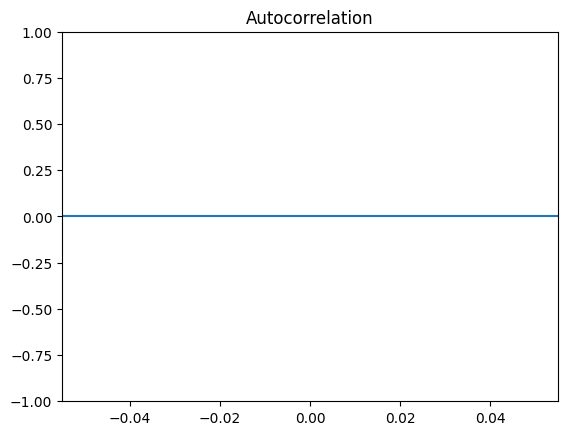

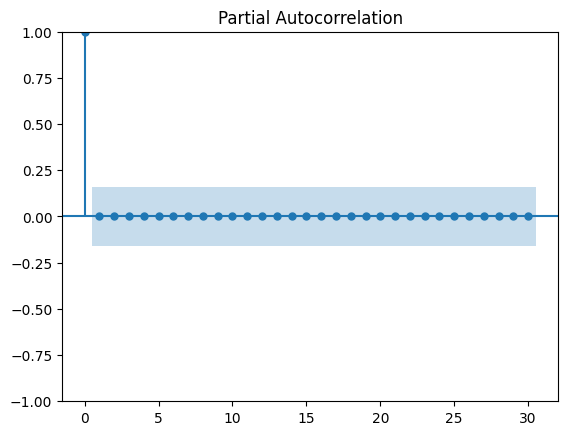

In [21]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

plt.figure(figsize=(12,4))
plt.plot(df_daily.index, df_daily['forecast'])
plt.title("Daily Sales")
plt.show()

# Decomposition (seasonal_period depends on frequency; e.g., 7 for weekly seasonality)
res = sm.tsa.seasonal_decompose(df_daily['forecast'], model='additive', period=7)
res.plot()
plt.show()

# ACF/PACF
sm.graphics.tsa.plot_acf(df_daily['forecast'], lags=30)
sm.graphics.tsa.plot_pacf(df_daily['forecast'], lags=30)
plt.show()
